### EDA

##### Declarations

In [7]:
#Defining libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Importing helper functions
%run "helper_functions.ipynb"

In [9]:
#Input and output paths for all pickle files. To be used to load and save these files
#Output
input_path="C:\\Users\\Anuvrat\\OneDrive\\Documents\\milestone1\\data\\inputs"
output_path="C:\\Users\\Anuvrat\\OneDrive\\Documents\\milestone1\\data\\inputs"

##### Load pickle files

In [10]:
df_income_1901_edited=pd.read_pickle(input_path+"\\df_income_1901_edited.pkl")
df_health_outcomes_edited=pd.read_pickle(input_path+"\\df_health_outcomes_edited.pkl")
df_sdoh_edited=pd.read_pickle(input_path+"\\df_sdoh_edited.pkl")
df_state_politics_edited=pd.read_pickle(input_path+"\\df_state_politics_edited.pkl")
df_state_public_spend_edited=pd.read_pickle(input_path+"\\df_state_public_spend_edited.pkl")
df_acs_edited=pd.read_pickle(input_path+"\\df_acs_keep_edited.pkl")

#### Exploratory Data Analysis for individual dataesets

##### Census Income levels

In [11]:
df_income_1901_edited.head()

,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Margin of Error Households Median income (dollars),Estimate Families Total,Percent Families lt 10k,Estimate Families Median income (dollars),Margin of Error Families Median income (dollars),Estimate Nonfamily households Total,Percent Nonfamily households lt 10k,Estimate Nonfamily households Median income (dollars),ZIP,Percent Households that are Families,Margin of Error Households Median income (percent),Margin of Error Families Median income (percent)
0,5341,27.1,17526.0,1697.0,3527,21.0,19628.0,2030.0,1814,45.6,10740.0,00601,0.660363,0.096828,0.103424
1,12777,24.3,20260.0,1494.0,8652,16.9,24126.0,1980.0,4125,42.1,13060.0,00602,0.677154,0.073741,0.082069
2,19624,31.0,17703.0,1223.0,12751,25.1,24062.0,1934.0,6873,45.2,11301.0,00603,0.649766,0.069084,0.080376
3,1948,25.9,19603.0,3497.0,1316,25.6,21439.0,4857.0,632,29.4,16716.0,00606,0.675565,0.178391,0.226550
4,8781,20.3,22796.0,1701.0,5872,17.1,26914.0,2712.0,2909,33.1,13634.0,00610,0.668717,0.074618,0.100765


###### Histograms to see distributions

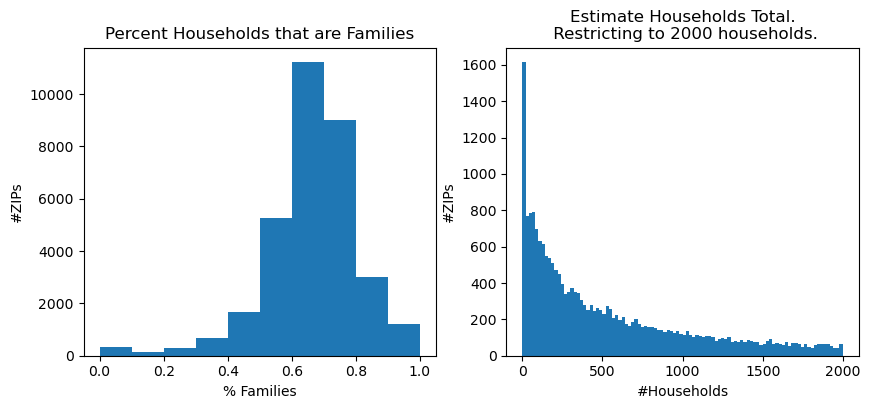

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_income_1901_edited['Percent Households that are Families'])
ax2.hist(df_income_1901_edited[df_income_1901_edited['Estimate Households Total']<2000]['Estimate Households Total'], bins=100, histtype='stepfilled')
ax1.set_title("Percent Households that are Families")
ax2.set_title("Estimate Households Total.\n Restricting to 2000 households.")
ax1.set_xlabel("% Families")
ax1.set_ylabel("#ZIPs")
ax2.set_xlabel("#Households")
ax2.set_ylabel("#ZIPs");

Insights: 
<ol>
<li>We see a good spread slighthly left-skewed histogram for % households that are families.</li>
<li>The histogram centers around 0.7-0.8.</li>
<li>This can be a potential feature to look at.</li>
</ol>

Text(0, 0.5, '#ZIPs')

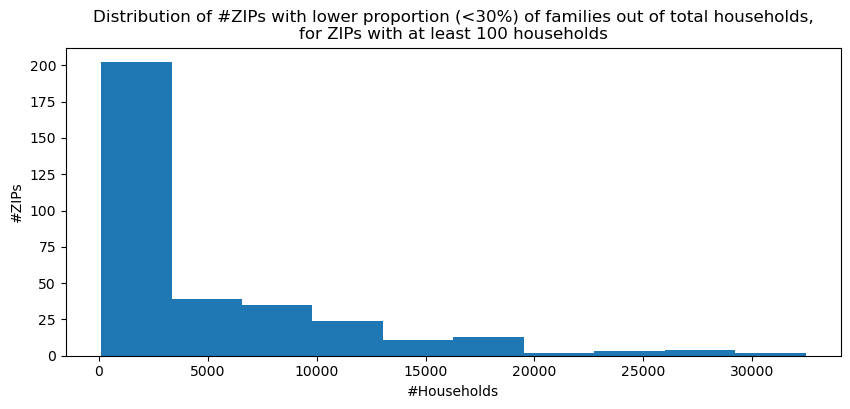

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(df_income_1901_edited[(df_income_1901_edited['Percent Households that are Families']<0.3) & 
                      (df_income_1901_edited['Estimate Households Total'] >=100)]['Estimate Households Total'])
ax.set_title("Distribution of #ZIPs with lower proportion (<30%) of families out of total households,\nfor ZIPs with at least 100 households");
ax.set_xlabel("#Households")
ax.set_ylabel("#ZIPs")

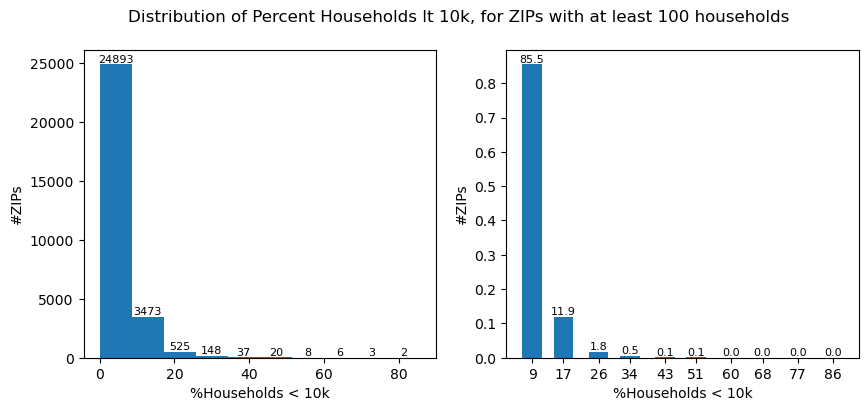

In [14]:
#Histogram: Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
counts, bins, bars = ax1.hist(df_income_1901_edited[df_income_1901_edited['Estimate Households Total'] >=100]['Percent Households lt 10k'])
#ax1.set_title("Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households");
ax1.set_xlabel("%Households < 10k")
ax1.set_ylabel("#ZIPs")
ax1.bar_label(bars, fontsize=8)

#Creating dataset for barchart
tmp_lt_10k=pd.DataFrame({'counts':counts, 'bins_max':np.round(bins[1:],0), 'per':counts/counts.sum()})
tmp_lt_10k['bins']=tmp_lt_10k['bins_max'].astype('string')
for _ in sorted(np.arange(len(tmp_lt_10k.bins)), key=lambda x: -x): 
    if _==0:
        tmp_lt_10k.loc[_,'bins']='0-'+str(np.round(tmp_lt_10k.loc[_,'bins_max']))
    else:
        tmp_lt_10k.loc[_,'bins']=str(np.round(tmp_lt_10k.loc[_-1,'bins_max']))+'-'+str(np.round(tmp_lt_10k.loc[_,'bins_max']))

#Bar-chart: Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households
ax2.bar(x=tmp_lt_10k.bins_max, height=tmp_lt_10k.per, width=5, label=tmp_lt_10k.per)
#ax2.set_title("Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households");
ax2.set_xlabel("%Households < 10k")
ax2.set_ylabel("#ZIPs")
ax2.set_xticks(tmp_lt_10k.bins_max)

rects = ax2.patches

# Make some labels.
labels = [np.round(100*tmp_lt_10k.loc[i, 'per'],1) for i in np.arange(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2, height *1, label, ha="center", va="bottom", fontsize=8
    )

plt.suptitle("Distribution of Percent Households lt 10k, for ZIPs with at least 100 households")
plt.show();

Insights: 
<ol>
<li>Only ~15%(100-85.5) ZIPs have more than 10% households earning less than $10K per annum. </li>
<li>Though this variable may not have a wide spread and as such may not be usable for correlations, etc.; we can probably form two groups of ZIPs: one with &gt20% households earning less than $10K and another with &lt5% households earning less than $10k. This may yield some interesting results. </li>
</ol>

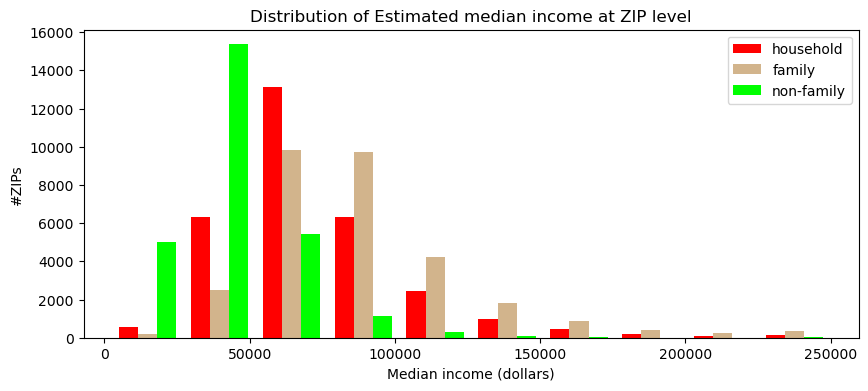

In [15]:
colors = ['red', 'tan', 'lime']
legend_labels = ['household', 'family', 'non-family']

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(df_income_1901_edited[['Estimate Households Median income (dollars)', 
                               'Estimate Families Median income (dollars)', 'Estimate Nonfamily households Median income (dollars)']], 
                               histtype='bar', color=colors, label=legend_labels)
ax.set_xlabel("Median income (dollars)")
ax.set_ylabel("#ZIPs")
ax.set_title("Distribution of Estimated median income at ZIP level")
ax.legend(prop={'size': 10});

Insights: 
<ol>
<li>Families have higher median income than non-family Households looking at the histogram. Hypothesis (not fact): This may be due to higher single earning population among non-family households. Further investigation can find how the data is being reported i.e. is income averaged at the family unit level or summed up when reporting. </li>
<li>Most non-family households earn &lt50K while family households earn closer to 100K. This may add some fire to the hypothesis given in #1 above.  </li>
<li>This may be a good variable to consider looking at the wide distribution in the histogram. </li>
</ol>

###### Margin of error

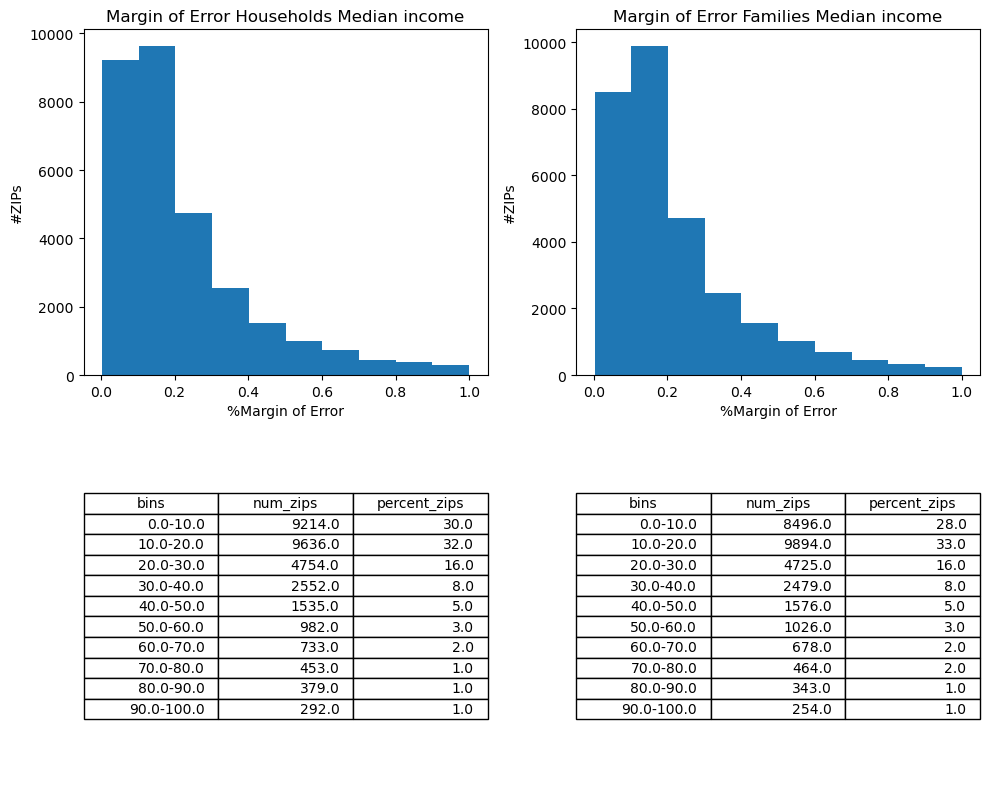

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
counts_h, bins_h, bars_h = ax1.hist(df_income_1901_edited['Margin of Error Households Median income (percent)'])
counts_f, bins_f, bars_f = ax2.hist(df_income_1901_edited['Margin of Error Families Median income (percent)'])                               
ax1.set_title("Margin of Error Households Median income")
ax2.set_title("Margin of Error Families Median income")
ax1.set_xlabel("%Margin of Error")
ax1.set_ylabel("#ZIPs")
ax2.set_xlabel("%Margin of Error")
ax2.set_ylabel("#ZIPs");

#Margin of error for households and families
moe_h=pd.DataFrame({'bins':[str(np.round(bins_h[_]*100))+"-"+str(np.round(bins_h[_+1]*100)) for _ in np.arange(len(bins_h)-1)], 'num_zips':counts_h,
              'percent_zips':np.round(counts_h/counts_h.sum()*100)})
moe_f=pd.DataFrame({'bins':[str(np.round(bins_f[_]*100))+"-"+str(np.round(bins_f[_+1]*100)) for _ in np.arange(len(bins_f)-1)], 'num_zips':counts_f,
              'percent_zips':np.round(counts_f/counts_f.sum()*100)})

ax3.table(cellText=moe_h.values, colLabels=moe_h.columns, loc='center')
ax4.table(cellText=moe_f.values, colLabels=moe_f.columns, loc='center')                               

ax3.axis('off')
ax3.axis('tight')
ax4.axis('off')
ax4.axis('tight')
fig.tight_layout()

plt.show()

In [96]:
tmp_tot_zips=df_income_1901_edited.shape[0]

tmp_moe_gt_50=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Households Median income (percent)']>0.5) & (df_income_1901_edited['Estimate Households Total']>0)].shape[0]
tmp_moe_gt_50_house_gt_100=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Households Median income (percent)']>0.5) &  (df_income_1901_edited['Estimate Households Total']>100)].shape[0]

print(f"Number of ZIPs (Total): {tmp_tot_zips}")
print(f"Number of ZIPs with >50% margin of error: {tmp_moe_gt_50} ({np.round(100*tmp_moe_gt_50/tmp_tot_zips, 1)}%)")
print(f"Number of ZIPs with >50% margin of error & >100 households: {tmp_moe_gt_50_house_gt_100} ({np.round(100*tmp_moe_gt_50_house_gt_100/tmp_tot_zips, 1)}%)")

tmp_tot_zips=df_income_1901_edited.shape[0]
tmp_moe_gt_50=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Families Median income (percent)']>0.5) & (df_income_1901_edited['Estimate Families Total']>0)].shape[0]
tmp_moe_gt_50_house_gt_100=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Families Median income (percent)']>0.5) &  (df_income_1901_edited['Estimate Families Total']>100)].shape[0]

print(f"Number of ZIPs (Total): {tmp_tot_zips}")
print(f"Number of ZIPs with >50% margin of error (families): {tmp_moe_gt_50} ({np.round(100*tmp_moe_gt_50/tmp_tot_zips, 1)}%)")
print(f"Number of ZIPs with >50% margin of error (families) & >100 families: {tmp_moe_gt_50_house_gt_100} ({np.round(100*tmp_moe_gt_50_house_gt_100/tmp_tot_zips, 1)}%)")

Number of ZIPs (Total): 33774
Number of ZIPs with >50% margin of error: 2850 (8.4%)
Number of ZIPs with >50% margin of error & >100 households: 1941 (5.7%)
Number of ZIPs (Total): 33774
Number of ZIPs with >50% margin of error (families): 2772 (8.2%)
Number of ZIPs with >50% margin of error (families) & >100 families: 1657 (4.9%)


Insights: 
<ol>
<li>8% ZIPs have more than 50% margin of error in the median household/families income. These ZIPs should be pressure tested if they tilt the balance of our insights.</li>
<li>These features are not to be used for analysis itself. But it gives us confidence that the data is reasonably clean for at least 92% ZIPs.</li>
</ol>